## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns

In [3]:
df = pd.read_csv("results.csv")
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [145]:
df["date"] = df["date"].astype("datetime64")

## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [5]:
world_cup_df = df[df["tournament"].eq("FIFA World Cup")]
world_cup_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True


In [20]:
scores_df = world_cup_df[["home_team", "away_team", "home_score", "away_score"]]

In [21]:
scores_df.head()

,home_team,away_team,home_score,away_score
1304,Belgium,United States,0,3
1305,France,Mexico,4,1
1306,Brazil,Yugoslavia,1,2
1307,Peru,Romania,1,3
1308,Argentina,France,1,0


In [37]:
scores_home = scores_df[["home_team", "home_score"]]
scores_away = scores_df[["away_team", "away_score"]]

In [39]:
scores_home.columns = ["team", "goals"]
scores_away.columns = ["team", "goals"]

In [41]:
scores_home.head()

,team,goals
1304,Belgium,0
1305,France,4
1306,Brazil,1
1307,Peru,1
1308,Argentina,1


In [45]:
scores_away.head()

,team,goals
1304,United States,3
1305,Mexico,1
1306,Yugoslavia,2
1307,Romania,3
1308,France,0


In [48]:
scores = pd.concat([scores_home, scores_away])

In [51]:
scores.head()

,team,goals
1304,Belgium,0
1305,France,4
1306,Brazil,1
1307,Peru,1
1308,Argentina,1


In [63]:
total_goals = scores.groupby("team").sum().sort_values("goals", ascending=False)

In [ ]:
total_goals

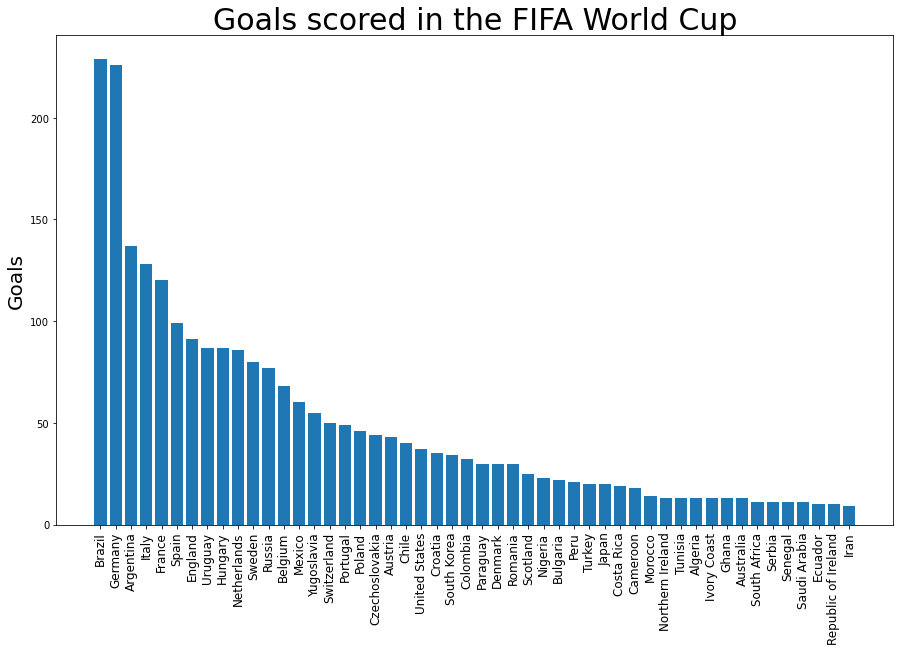

In [79]:
pyplot.figure(figsize=(15,9))
pyplot.title("Goals scored in the FIFA World Cup", fontsize=30)
pyplot.ylabel("Goals", fontsize=20)
pyplot.xticks(fontsize=12, rotation=90)

pyplot.bar(x=total_goals.head(50).index, height=total_goals.head(50)["goals"]);

## Task
What is the number of matches played in each tournament throughout history?

In [23]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [89]:
help(mbt_df.reindex)

Help on method reindex in module pandas.core.frame:

reindex(labels=None, index=None, columns=None, axis=None, method=None, copy=True, level=None, fill_value=nan, limit=None, tolerance=None) method of pandas.core.frame.DataFrame instance
    Conform Series/DataFrame to new index with optional filling logic.
    
    Places NA/NaN in locations having no value in the previous index. A new object
    is produced unless the new index is equivalent to the current one and
    ``copy=False``.
    
    Parameters
    ----------
    
    keywords for axes : array-like, optional
        New labels / index to conform to, should be specified using
        keywords. Preferably an Index object to avoid duplicating data.
    
    method : {None, 'backfill'/'bfill', 'pad'/'ffill', 'nearest'}
        Method to use for filling holes in reindexed DataFrame.
        Please note: this is only applicable to DataFrames/Series with a
        monotonically increasing/decreasing index.
    
        * None (defa

In [157]:
matches_by_tournament = df.groupby("tournament").size().sort_values(ascending=False)
mbt_df = matches_by_tournament.to_frame()
mbt_df = mbt_df.reset_index()
mbt_df.columns = ["tournament", "number_of_matches"]
# mbt_df = mbt_df.drop(0)
mbt_df.head()

,tournament,number_of_matches
1,FIFA World Cup qualification,7236
2,UEFA Euro qualification,2582
3,African Cup of Nations qualification,1672
4,FIFA World Cup,900
5,Copa América,813


In [93]:
help(sns.catplot)

Help on function catplot in module seaborn.categorical:

catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7fbb09928b80>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
    Figure-level interface for drawing categorical plots onto a FacetGrid.
    
    This function provides access to several axes-level functions that
    show the relationship between a numerical and one or more categorical
    variables using one of several visual representations. The ``kind``
    parameter selects the underlying axes-level function to use:
    
    Categorical scatterplots:
    
    - :func:`stripplot` (with ``kind="strip"``; the default)
    - :func:`swarmplot` (with ``kind="swarm"``)
    
    Categorical dist

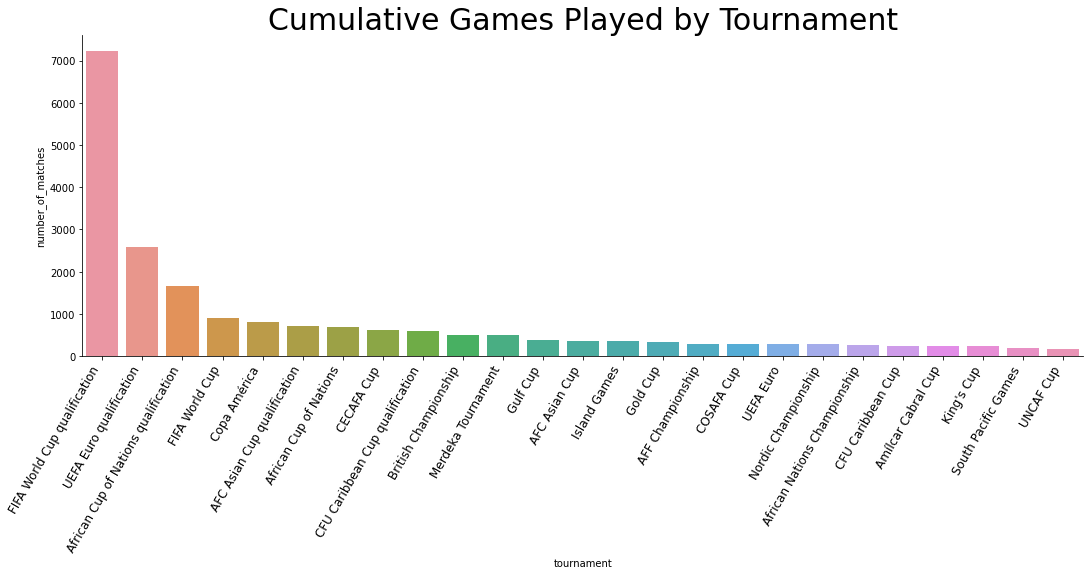

In [167]:
sns.catplot(x=mbt_df.head(25)["tournament"], y=mbt_df.head(25)["number_of_matches"], data=mbt_df, kind="bar", height=5, aspect=3)
pyplot.title(label="Cumulative Games Played by Tournament", fontsize=30)
pyplot.xticks(rotation=60, ha="right", fontsize=12)
pyplot.show()

## Task 
Show the trend in number of matches per year.

In [137]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [146]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [149]:
df.groupby(df["date"].dt.year).size()

date
1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2016     926
2017     958
2018     905
2019    1155
2020       7
Length: 149, dtype: int64

## Task
Which teams are the most successful ones? (winning percentage)

## Task
Which teams are the least successful ones? (winning percentage)

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

## Task
Which teams played against each other the most?

## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.